# Make CSV --> Data Frame 

In [39]:
import csv
import pandas as pd
import ast

csv_file = "FOXCONN_ELECTRONICS_ESG.csv"

with open(csv_file, 'r') as file:
    csv_reader = csv.reader(file)
    head_rows = []
    column_names = next(csv_reader)  
    for row in csv_reader:
        head_rows.append(row)

df = pd.DataFrame(head_rows, columns = column_names)
df['comp_rel'] = df['comp_rel'].astype(int)
df['esg_rel'] = [list(map(int, filter(None, row[1:-1].split(',')))) if isinstance(row, str) and row[1:-1] else row for row in df['esg_rel']]
df['esg'] = [row.split(", ") for row in df['esg']]
print(df.head(5))
print(df.shape)

           id                                        doc_created  \
0  3735110447  ['1658142027000', '1658142027000', '1658142027...   
1  3737337763  ['1658305842000', '1658305842000', '1658305842...   
2  3723996173  ['1657244116000', '1657244116000', '1657244116...   
3  3724038045  ['1657248749000', '1657248749000', '1657248749...   
4  3722651171  ['1657153423000', '1657153423000', '1657153423...   

                  comp  comp_rel  \
0  FOXCONN_ELECTRONICS        46   
1  FOXCONN_ELECTRONICS       100   
2  FOXCONN_ELECTRONICS        24   
3  FOXCONN_ELECTRONICS        24   
4  FOXCONN_ELECTRONICS        45   

                                                 esg  \
0  [['SUSTAINABILITY_ETHICS_CONTRA', 'HUMAN_WORKP...   
1  [['SUSTAINABILITY_ETHICS_CONTRA', 'HUMAN_WORKP...   
2  [['SUSTAINABILITY_ETHICS_PRO', 'BUSINESS_PRO',...   
3  [['SUSTAINABILITY_ETHICS_PRO', 'BUSINESS_PRO',...   
4  [['SUSTAINABILITY_ETHICS_PRO', 'HUMAN_WORKPLAC...   

                                     

# Relavance / Data Cleaning

### Company Relavance Threshold: 40

In [40]:
df = df[df['comp_rel'] >= 40]
print(df.head(7))
print(df.shape)

            id                                        doc_created  \
0   3735110447  ['1658142027000', '1658142027000', '1658142027...   
1   3737337763  ['1658305842000', '1658305842000', '1658305842...   
25  3740004503  ['1658485226000', '1658485226000', '1658485226...   
30  3740862200  ['1658512342000', '1658512342000', '1658512342...   
39  3734701704  ['1658103360000', '1658103360000', '1658103360...   
56  3731774431                 ['1657841754000', '1657841754000']   
92  3717804391  ['1656772542000', '1656772542000', '1656772542...   

                   comp  comp_rel  \
0   FOXCONN_ELECTRONICS        46   
1   FOXCONN_ELECTRONICS       100   
25  FOXCONN_ELECTRONICS        81   
30  FOXCONN_ELECTRONICS        81   
39  FOXCONN_ELECTRONICS        71   
56  FOXCONN_ELECTRONICS       100   
92  FOXCONN_ELECTRONICS       100   

                                                  esg               esg_rel  
0   [['SUSTAINABILITY_ETHICS_CONTRA', 'HUMAN_WORKP...          [30, 30, 

### Total ESG Relevance Threshold: 36

In [41]:
df = df[[row['esg_rel'][0] >= 36 for _, row in df.iterrows()]]
print(df.iloc[10:15])
print(df.shape)

             id                         doc_created                 comp  \
178  3738839013                   ['1658406141000']  FOXCONN_ELECTRONICS   
214  3716110454  ['1656643183000', '1656643183000']  FOXCONN_ELECTRONICS   
217  3728472743  ['1657625400000', '1657625400000']  FOXCONN_ELECTRONICS   
218  3728465937  ['1657625400000', '1657625400000']  FOXCONN_ELECTRONICS   
219  3728451397  ['1657625467000', '1657625467000']  FOXCONN_ELECTRONICS   

     comp_rel                                             esg    esg_rel  
178        46              [['LOCAL_BUSINESS_SUPPLIERS_PRO']]       [45]  
214       100        [['BUSINESS_PRO', 'TRANSPORTATION_PRO']]   [49, 49]  
217       100  [['INNOVATION_RD_PRO', 'DATA_PRIVACY_CONTRA']]  [100, 40]  
218       100  [['INNOVATION_RD_PRO', 'DATA_PRIVACY_CONTRA']]  [100, 40]  
219       100  [['INNOVATION_RD_PRO', 'DATA_PRIVACY_CONTRA']]  [100, 40]  
(1288, 6)


### ESG Topic Threshold: 36 (Remove 'esg' catagories)

In [42]:
for index, row in df.iterrows():
    indices_less_than_36 = [i for i, num in enumerate(row['esg_rel']) if num < 36]
    for i in reversed(indices_less_than_36):
        if i > 0:
            del row['esg'][i]

print(df.iloc[11:14])

             id                         doc_created                 comp  \
214  3716110454  ['1656643183000', '1656643183000']  FOXCONN_ELECTRONICS   
217  3728472743  ['1657625400000', '1657625400000']  FOXCONN_ELECTRONICS   
218  3728465937  ['1657625400000', '1657625400000']  FOXCONN_ELECTRONICS   

     comp_rel                                             esg    esg_rel  
214       100        [['BUSINESS_PRO', 'TRANSPORTATION_PRO']]   [49, 49]  
217       100  [['INNOVATION_RD_PRO', 'DATA_PRIVACY_CONTRA']]  [100, 40]  
218       100  [['INNOVATION_RD_PRO', 'DATA_PRIVACY_CONTRA']]  [100, 40]  


### ESG Topic Threshold: 36 (Remove 'esg_rel' numbers)

In [43]:
# deletes an esg_rel less than 36
for index, row in df.iterrows():
    updated_esg_rel = [num for num in row['esg_rel'] if num >= 36]
    df.at[index, 'esg_rel'] = updated_esg_rel

print(df['esg'])
print(df['esg_rel'])
print(df.shape)

25      [['HUMAN_WORKPLACE_PRO', 'WORKPLACE_PRO', 'WOR...
30      [['HUMAN_WORKPLACE_PRO', 'WORKPLACE_PRO', 'WOR...
39      [['NATURE_ENVIRONMENT_PRO', 'ENERGY_PRO', 'BUS...
56                [['BUSINESS_PRO', 'INNOVATION_RD_PRO']]
108     [['SUSTAINABILITY_ETHICS_CONTRA', 'BUSINESS_CO...
                              ...                        
6464    [['HUMAN_WORKPLACE_PRO', 'WORKPLACE_PRO', 'LAB...
6475           [['INITIATIVES_PRO', 'COMMUNITY_WELFARE']]
6478           [['INITIATIVES_PRO', 'COMMUNITY_WELFARE']]
6481    [['SUSTAINABILITY_ETHICS_CONTRA', 'BUSINESS_CO...
6487    [['SUSTAINABILITY_ETHICS_PRO', 'COMMUNITY_PRO'...
Name: esg, Length: 1288, dtype: object
25                          [90, 90, 90, 90, 90]
30                          [90, 90, 90, 90, 90]
39                              [73, 73, 54, 54]
56                                      [60, 60]
108                         [100, 100, 100, 100]
                          ...                   
6464    [49, 49, 49, 49, 49, 

## Collecting IDs

In [44]:
id_list = []  # Create an empty list to store the 'Id' values

for index, row in df.iterrows():
    id_value = row['id']  # Get the value in the 'Id' column for the current row
    id_list.append(id_value)  # Append the value to the list

print(id_list)  # Print the list of 'Id' values
print(len(id_list))

['3740004503', '3740862200', '3734701704', '3731774431', '3737918120', '3737838234', '3737809180', '3744734880', '3722110938', '3735175855', '3738839013', '3716110454', '3728472743', '3728465937', '3728451397', '3728460224', '3728443608', '3728457216', '3719871441', '3719875363', '3720113719', '3720236826', '3764385211', '3764436595', '3782751062', '3773771531', '3754407004', '3781403396', '3781373787', '3781291977', '3759842720', '3752304290', '3769458775', '3754627046', '3754586765', '3756213739', '3758689476', '3754608937', '3759989523', '3760166862', '3765362055', '3769265876', '3791051003', '3808536050', '3814502661', '3793360189', '3793516310', '3809265965', '3785968434', '3804664388', '3804701274', '3804678668', '3805185876', '3804648974', '3804758671', '3804739079', '3804728343', '3804640864', '3804648027', '3804667498', '3804666347', '3804669748', '3804671605', '3804649177', '3804673457', '3804645662', '3804640821', '3804700672', '3804696039', '3804695206', '3804655170', '3804

In [45]:
import csv
import pandas as pd
import ast

csv_file = "bq-results-score.csv"

with open(csv_file, 'r') as file:
    csv_reader = csv.reader(file)
    head_rows = []
    column_names = next(csv_reader)  
    for row in csv_reader:
        head_rows.append(row)


dff = pd.DataFrame(head_rows, columns = column_names)
print(dff.head(5))

   BATCH_TIME        TIME              COMPANY              THREAT  \
0  1673001000  1673001000  FOXCONN_ELECTRONICS  TRANSPORTATION_PRO   
1  1672999200  1672999200  FOXCONN_ELECTRONICS  TRANSPORTATION_PRO   
2  1673001000  1673001000  FOXCONN_ELECTRONICS  TRANSPORTATION_PRO   
3  1672999200  1672999200  FOXCONN_ELECTRONICS  TRANSPORTATION_PRO   
4  1672992000  1672992000  FOXCONN_ELECTRONICS  TRANSPORTATION_PRO   

  DOCUMENT_ID SCORE  
0  3925578449    92  
1  3925578449    92  
2  3925468790    93  
3  3925468790    93  
4  3925578449    92  


In [46]:
document_ids = []  # Create an empty list to store the 'DOCUMENT_ID' values

for index, row in dff.iterrows():
    if row['COMPANY'] == 'FOXCONN_ELECTRONICS':
        document_ids.append(row['DOCUMENT_ID'])

document_ids = list(set(document_ids)) # remove duplicates 

print(document_ids)  # Print the list of 'DOCUMENT_ID' values
print(len(document_ids))

['3993848708', '3862071441', '3839115715', '3840574007', '4061212842', '3793779698', '3840000389', '4059296928', '3882743895', '4028799235', '3839268070', '3988103447', '3871272747', '4059478035', '3883015195', '3858318975', '4054095553', '3839269019', '3923217457', '3862336192', '4032032847', '4008515288', '4051557521', '3699749086', '3881984269', '4061956947', '3870715680', '4032591729', '4028181096', '3886345084', '3882343859', '3907799829', '3961487203', '3862668352', '4026189753', '3990312094', '3839921113', '3961490544', '3854882973', '3883871362', '4032280301', '3907891181', '3872343836', '4028873900', '3882144335', '3887106899', '3830345192', '3991433362', '3863951651', '3988289030', '3853546316', '3845786631', '3862638525', '3881080866', '3761610924', '3815099350', '3728460224', '4060493274', '3885657441', '3854785876', '3858796384', '3862243371', '3855136536', '4061510086', '3990213819', '4032604025', '4032673132', '3880374110', '3863981512', '3844599570', '3991234692', '3707

In [47]:
common_ids = set(id_list).intersection(document_ids)
common_ids_count = len(common_ids)
print(common_ids_count)

241


In [48]:
common_scores = []  # Create an empty list to store the 'SCORE' values

for index, row in dff.iterrows():
    document_id = row['DOCUMENT_ID']
    if document_id in common_ids:
        score = row['SCORE']
        common_scores.append(score)

print(common_scores) 

['93', '93', '93', '93', '93', '93', '38', '43', '38', '43', '43', '43', '38', '42', '38', '43', '38', '43', '43', '43', '38', '42', '41', '46', '43', '44', '44', '44', '44', '41', '44', '38', '42', '38', '42', '42', '42', '38', '42', '42', '43', '43', '43', '46', '46', '46', '43', '47', '47', '38', '38', '42', '42', '42', '42', '38', '42', '57', '57', '57', '57', '57', '57', '57', '57', '57', '41', '41', '39', '39', '35', '35', '39', '39', '39', '39', '35', '39', '42', '43', '43', '42', '45', '44', '45', '42', '45', '45', '43', '43', '39', '39', '43', '46', '46', '46', '47', '47', '36', '43', '47', '45', '46', '45', '46', '46', '43', '46', '54', '54', '54', '54', '54', '54', '54', '54', '54', '43', '46', '46', '46', '47', '47', '42', '46', '44', '45', '44', '45', '45', '42', '45', '54', '54', '54', '54', '54', '54', '54', '54', '35', '35', '35', '35', '35', '35', '35', '39', '39', '39', '39', '35', '39', '41', '40', '41', '39', '42', '42', '42', '39', '43', '43', '42', '46', '44', '45

# Equation Building

## Varaibles/Inputs

In [49]:
# Subcatagories Quanified 
GHG_PRO = 0
Energy_PRO = 0
Waste_PRO = 0
Sustainability_PRO = 0
Biodiversity_PRO = 0
Equality_PRO = 0
Local_Support_PRO = 0
Labor_Rights_PRO = 0
Customer_Rights_PRO = 0
Proper_Management_PRO = 0
Sustainability_Efforts_PRO = 0 
Anti_Corruption_PRO = 0
Political_Influence_PRO = 0
GHG_CONTRA = 0
Energy_CONTRA= 0
Waste_CONTRA = 0
Sustainability_CONTRA = 0
Biodiversity_CONTRA = 0
Equality_CONTRA = 0
Local_Support_CONTRA = 0
Labor_Rights_CONTRA = 0
Customer_Rights_CONTRA = 0
Proper_Management_CONTRA = 0
Sustainability_Efforts_CONTRA = 0 
Anti_Corruption_CONTRA = 0
Political_Influence_CONTRA = 0

# Equation Varaibles 
Be = 0
Bs = 0
Bg = 0
De = 0
Ds = 0
Dg = 0
APCe = 0
APCs = 0
APCg = 0

# Subcatagory Substrings 
GHG_PRO_substrings = ['EMISSIONS_PRO']
Energy_PRO_substrings = ['ENERGY_PRO']
Waste_PRO_substrings = ['WATER_PRO','WASTE_PRO', 'TOXIC_CHEMICALS_PRO', 'RECYCLING_PRO']
Sustainability_PRO_substrings = ['NATURE_ENVIRONMENT_PRO', 'RESOURCES_PRO', 'PACKAGING_PRO', 'TRANSPORTATION_PRO'
                                 'CONSUMPTION_PRO', 'FASHION_PRO']
Biodiversity_PRO_substrings = ['FOREST_PRO', 'ANIMALS_PRO', 'AGRICULTURE_PRO', 'BIODIVERSITY_PRO']
Equality_PRO_substrings = ['WORKPLACE_PRO', 'WORKPLACE_DIVERSITY_PRO', 'WORKPLACE_DISCRIMINATION_PRO', 'WOMEN_PRO', 'DIVERSITY_PRO']
Local_Support_PRO_substrings = ['COMMUNITY_PRO', 'STARTUPS_PRO', 'COMMUNITY_WELFARE', 'LOCAL_BUSINESS_SUPPLIERS_PRO']
Labor_Rights_PRO_substrings = ['HUMAN_WORKPLACE_PRO', 'MODERN_SLAVERY_PRO', 'LABOR_RIGHTS_PRO', 'ASSOCIATION_UNIONS_PRO', 'HOURS_WAGES_PRO'
                               'CHILD_LABOR_PRO', 'HEALTH_SAFETY_PRO', 'WORKER_TRAINING_PRO', 'HUMAN_PRO', 'FORCED_MARRIAGE_PRO'
                               'CHILD_MARRIAGE_PRO', 'TRAINING_EDUCATION_PRO']
Customer_Rights_PRO_substrings = ['DATA_PRIVACY_PRO', 'GREEN_MARKETING_PRO']
Proper_Management_PRO_substrings = ['WHISTLEBLOWING_RETALIATION_PRO', 'ETHICS_COMPLIANCE_PRO']
Sustainability_Efforts_PRO_substrings = ['BUSINESS_PRO', 'TRANSPARENCY_TRACEABILITY_PRO', 'SUPPLY_CHAIN_PRO']
Anti_Corruption_PRO_substrings = ['RETALIATION_PRO', 'CORRUPTION_PRO', 'ANTICOMPETITIVE_BEHAVIOR_PRO', 'FAIR_TRADE_PRO']
Political_Influence_PRO_substrings = ['CONFLICT_COMMODITIES_PRO', 'INNOVATION_RD_PRO', 'RESPONSIBLE_PURCHASING_PRACTICES','PRODUCT_PRO'
                                      'DONATION_SPONSORSHIP_PRO', 'INITIATIVES_PRO', 'TERRORISM_SUPPORT_PRO']
GHG_CONTRA_substrings = ['EMISSIONS_CONTRA']
Energy_CONTRA_substrings = ['ENERGY_CONTRA']
Waste_CONTRA_substrings = ['WATER_CONTRA', 'WATER_CONTAMINATION', 'WASTE_CONTRA', 'MERCURY_CONTRA', 'POP_TOXIC_CHEMICALS_CONTRA'
                           'PACKAGING_CONTRA', 'OVERPRODUCTION', 'RECYCLING_CONTRA']
Sustainability_CONTRA_substrings = ['NATURE_ENVIRONMENT_CONTRA', 'RESOURCES_CONTRA', 'TRANSPORTATION_CONTRA', 
                                    'CONSUMPTION_CONTRA', 'FASHION_CONTRA']
Biodiversity_CONTRA_substrings = ['FOREST_CONTRA', 'ANIMALS_CONTRA', 'LABORATORY_ANIMALS_NEGLIGENCE'
                                  'AGRICULTURE_CONTRA', 'BIODIVERSITY_CONTRA']
Equality_CONTRA_substrings = ['WORKPLACE_DISCRIMINATION_CONTRA', 'WOMEN_CONTRA', 'LAND_CONTRA', 'DIVERSITY_CONTRA']
Local_Support_CONTRA_substrings = ['COMMUNITY_CONTRA']
Labor_Rights_CONTRA_substrings = ['HUMAN_WORKPLACE_CONTRA', 'WORKPLACE_CONTRA', 'MODERN_SLAVERY_CONTRA', 'FORCED_LABOR_CONTRA'
                                  'BONDED_LABOR_CONTRA', 'CHILD_SLAVERY_CONTRA', 'LABOR_RIGHTS_CONTRA', 'ASSOCIATION_UNIONS_CONTRA'
                                  'HOURS_WAGES_CONTRA', 'WORKPLACE_ABUSE', 'CHILD_LABOR_CONTRA', 'HEALTH_SAFETY_CONTRA'
                                  'WORKER_TRAINING_CONTRA', 'HUMAN_CONTRA', 'FORCED_MARRIAGE_CONTRA', 'CHILD_MARRIAGE_CONTRA', 'SEX_TRAFFICKING_CONTRA']
Customer_Rights_CONTRA_substrings = ['DATA_PRIVACY_CONTRA']
Proper_Management_CONTRA_substrings = ['WHISTLEBLOWING_RETALIATION_CONTRA', 'EMPLOYEE_NEGLIGENCE_CONTRA', 'USE_OF_SECURITY_FORCES_CONTRA', 'ETHICS_COMPLIANCE_CONTRA']
Sustainability_Efforts_CONTRA_substrings = ['TRANSPARENCY_TRACEABILITY_CONTRA', 'PRODUCT_CONTRA', 'MARKET_NEGLIGENCE'
                                            'SUPPLY_CHAIN_CONTRA', 'POPULATION_CONTRA']
Anti_Corruption_CONTRA_substrings = ['BUSINESS_CONTRA', 'RETALIATION_CONTRA', 'CORRUPTION_CONTRA', 'ANTICOMPETITIVE_BEHAVIOR_CONTRA']
Political_Influence_CONTRA_substrings = ['CONFLICT_COMMODITIES_CONTRA', 'TERRORISM_SUPPORT_CONTRA']

## Quantification 

In [50]:
# Quanification 
# Iterate over each row in the dataframe
for index, row in df.iterrows():
    esg_list = row['esg']  # Access the 'esg' column as a list
    esg_rel_list = row['esg_rel']  # Access the 'esg_rel' column as a list
    comp_rel = row['comp_rel'] #Acces the 'com_rel' column 

    # Iterate over the 'esg' and 'esg_rel' lists within each row
    for esg, esg_rel in zip(esg_list, esg_rel_list):
        if any(substring in esg for substring in GHG_PRO_substrings):
            GHG_PRO += ((comp_rel + esg_rel) / 200)
        if any(substring in esg for substring in GHG_CONTRA_substrings):
            GHG_CONTRA += ((comp_rel + esg_rel) / 200)
        if any(substring in esg for substring in Energy_PRO_substrings):
            Energy_PRO += ((comp_rel + esg_rel) / 200)
        if any(substring in esg for substring in Energy_CONTRA_substrings):
            Energy_CONTRA += ((comp_rel + esg_rel) / 200)
        if any(substring in esg for substring in Waste_PRO_substrings):
            Waste_PRO += ((comp_rel + esg_rel) / 200)
        if any(substring in esg for substring in Waste_CONTRA_substrings):
            Waste_CONTRA += ((comp_rel + esg_rel) / 200)
        if any(substring in esg for substring in Sustainability_PRO_substrings):
            Sustainability_PRO += ((comp_rel + esg_rel) / 200)
        if any(substring in esg for substring in Sustainability_CONTRA_substrings):
            Sustainability_CONTRA += ((comp_rel + esg_rel) / 200)
        if any(substring in esg for substring in Biodiversity_PRO_substrings):
            Biodiversity_PRO += ((comp_rel + esg_rel) / 200)
        if any(substring in esg for substring in Biodiversity_CONTRA_substrings):
            Biodiversity_CONTRA += ((comp_rel + esg_rel) / 200)
        if any(substring in esg for substring in Equality_PRO_substrings):
            Equality_PRO += ((comp_rel + esg_rel) / 200)
        if any(substring in esg for substring in Equality_CONTRA_substrings):
            Equality_CONTRA += ((comp_rel + esg_rel) / 200)
        if any(substring in esg for substring in Local_Support_PRO_substrings):
            Local_Support_PRO += ((comp_rel + esg_rel) / 200)
        if any(substring in esg for substring in Local_Support_CONTRA_substrings):
            Local_Support_CONTRA += ((comp_rel + esg_rel) / 200)
        if any(substring in esg for substring in Labor_Rights_PRO_substrings):
            Labor_Rights_PRO += ((comp_rel + esg_rel) / 200)
        if any(substring in esg for substring in Labor_Rights_CONTRA_substrings):
            Labor_Rights_CONTRA += ((comp_rel + esg_rel) / 200)
        if any(substring in esg for substring in Customer_Rights_PRO_substrings):
            Customer_Rights_PRO += ((comp_rel + esg_rel) / 200)
        if any(substring in esg for substring in Customer_Rights_CONTRA_substrings):
            Customer_Rights_CONTRA += ((comp_rel + esg_rel) / 200)
        if any(substring in esg for substring in Proper_Management_PRO_substrings):
            Proper_Management_PRO += ((comp_rel + esg_rel) / 200)
        if any(substring in esg for substring in Proper_Management_CONTRA_substrings):
            Proper_Management_CONTRA += ((comp_rel + esg_rel) / 200)
        if any(substring in esg for substring in Sustainability_Efforts_PRO_substrings):
            Sustainability_Efforts_PRO += ((comp_rel + esg_rel) / 200)
        if any(substring in esg for substring in Sustainability_Efforts_CONTRA_substrings):
            Sustainability_Efforts_CONTRA += ((comp_rel + esg_rel) / 200)
        if any(substring in esg for substring in Anti_Corruption_PRO_substrings):
            Anti_Corruption_PRO += ((comp_rel + esg_rel) / 200)
        if any(substring in esg for substring in Anti_Corruption_CONTRA_substrings):
            Anti_Corruption_CONTRA += ((comp_rel + esg_rel) / 200)
        if any(substring in esg for substring in Political_Influence_PRO_substrings):
            Political_Influence_PRO += ((comp_rel + esg_rel) / 200)
        if any(substring in esg for substring in Political_Influence_CONTRA_substrings):
            Political_Influence_CONTRA += ((comp_rel + esg_rel) / 200)

## Subctagory Numbers 

In [51]:
# Enviroment (5)
GHG = (GHG_PRO - GHG_CONTRA) / (GHG_PRO + GHG_CONTRA)
Energy = (Energy_PRO - Energy_CONTRA) / (Energy_PRO + Energy_CONTRA)
Waste = (Waste_PRO - Waste_CONTRA) / (Waste_PRO + Waste_CONTRA)
Sustainability = (Sustainability_PRO - Sustainability_CONTRA) / (Sustainability_PRO + Sustainability_CONTRA)
Biodiversity = (Biodiversity_PRO - Biodiversity_CONTRA) / (Biodiversity_PRO + Biodiversity_CONTRA)

# Social (4)
Equality = (Equality_PRO - Equality_CONTRA) / (Equality_PRO + Equality_CONTRA)
Local_Support = (Local_Support_PRO - Local_Support_CONTRA) / (Local_Support_PRO + Local_Support_CONTRA)
Labor_Rights = (Labor_Rights_PRO - Labor_Rights_CONTRA) / (Labor_Rights_PRO + Labor_Rights_CONTRA)
Customer_Rights = (Customer_Rights_PRO - Customer_Rights_CONTRA) / (Customer_Rights_PRO + Customer_Rights_CONTRA)

# Governance (4)
Proper_Management = (Proper_Management_PRO - Proper_Management_CONTRA) / (Proper_Management_PRO + Proper_Management_CONTRA)
Sustainability_Efforts = (Sustainability_Efforts_PRO - Sustainability_Efforts_CONTRA) / (Sustainability_Efforts_PRO + Sustainability_Efforts_CONTRA)
Anti_Corruption = (Anti_Corruption_PRO - Anti_Corruption_CONTRA) / (Anti_Corruption_PRO + Anti_Corruption_CONTRA)
Political_Influence = (Political_Influence_PRO - Political_Influence_CONTRA) / (Political_Influence_PRO + Political_Influence_CONTRA)

# change scale from (-1 to 1) --> (0 to 100)

# Enviroment (5)
GHG = ((GHG + 1) / 2) * 100
Energy = ((Energy + 1) / 2) * 100
Waste = ((Waste + 1) / 2) * 100
Sustainability = ((Sustainability + 1) / 2) * 100
Biodiversity = ((Biodiversity + 1) / 2) * 100

# Social (4)
Equality = ((Equality + 1) / 2) * 100
Local_Support = ((Local_Support + 1) / 2) * 100
Labor_Rights = ((Labor_Rights + 1) / 2) * 100
Customer_Rights = ((Customer_Rights + 1) / 2) * 100

# Governance (4)
Proper_Management = ((Proper_Management + 1) / 2) * 100
Sustainability_Efforts = ((Sustainability_Efforts + 1) / 2) * 100
Anti_Corruption = ((Anti_Corruption + 1) / 2) * 100
Political_Influence = ((Political_Influence + 1) / 2) * 100


# print 
print(GHG)
print(Energy)
print(Waste)
print(Sustainability)
print(Biodiversity)
print(Equality)
print(Local_Support)
print(Labor_Rights)
print(Customer_Rights)
print(Proper_Management)
print(Sustainability_Efforts)
print(Anti_Corruption)
print(Political_Influence)

95.7201646090535
100.0
87.54436369781983
77.1943917043961
100.0
94.47615021489469
88.76397666504619
26.033678079378703
23.076923076923073
18.141720203279316
84.09081759993559
3.47567716970702
97.88500506585613


## Equation Varaibles Calculated

In [52]:
# Making Eqaution Varabiles 
Be = GHG_PRO + Energy_PRO + Waste_PRO + Sustainability_PRO + Biodiversity_PRO
Bs = Equality_PRO + Local_Support_PRO + Labor_Rights_PRO + Customer_Rights_PRO
Bg = Proper_Management_PRO + Sustainability_Efforts_PRO + Anti_Corruption_PRO + Political_Influence_PRO
De = GHG_CONTRA + Energy_CONTRA + Waste_CONTRA + Sustainability_CONTRA + Biodiversity_CONTRA
Ds = Equality_CONTRA + Local_Support_CONTRA + Labor_Rights_CONTRA + Customer_Rights_CONTRA
Dg = Proper_Management_CONTRA + Sustainability_Efforts_CONTRA + Anti_Corruption_CONTRA + Political_Influence_CONTRA
APCe = GHG_PRO + Energy_PRO + Waste_PRO + Sustainability_PRO + Biodiversity_PRO + GHG_CONTRA + Energy_CONTRA + Waste_CONTRA + Sustainability_CONTRA + Biodiversity_CONTRA
APCs = Equality_PRO + Local_Support_PRO + Labor_Rights_PRO + Customer_Rights_PRO + Equality_CONTRA + Local_Support_CONTRA + Labor_Rights_CONTRA + Customer_Rights_CONTRA
APCg = Proper_Management_PRO + Sustainability_Efforts_PRO + Anti_Corruption_PRO + Political_Influence_PRO + Proper_Management_CONTRA + Sustainability_Efforts_CONTRA + Anti_Corruption_CONTRA + Political_Influence_CONTRA

# Print or use the values as needed
print(Be)
print(Bs)
print(Bg)
print(De)
print(Ds)
print(Dg)
print(APCe)
print(APCs)
print(APCg)

141.72000000000003
526.3650000000005
193.71000000000004
19.82
541.6600000000005
133.96000000000006
161.54000000000005
1068.025000000001
327.67000000000013


## E, S, and G Ratings 

In [53]:
Environment = (Be - De) / APCe
Social = (Bs - Ds) / APCs
Governance = (Bg - Dg) / APCg

# change scale from (-1 to 1) --> (0 to 100)
Environment = ((Environment + 1) / 2) * 100
Social = ((Social + 1) / 2) * 100
Governance = ((Governance + 1) / 2) * 100

# print
print(Environment)
print(Social)
print(Governance)

87.73059304197103
49.28395870883172
59.11740470595416


# ESG Index Score

In [54]:
ESG_Index = (1/3) * (Environment + Social + Governance) 
print(ESG_Index) 

65.37731881891897


# Visualization

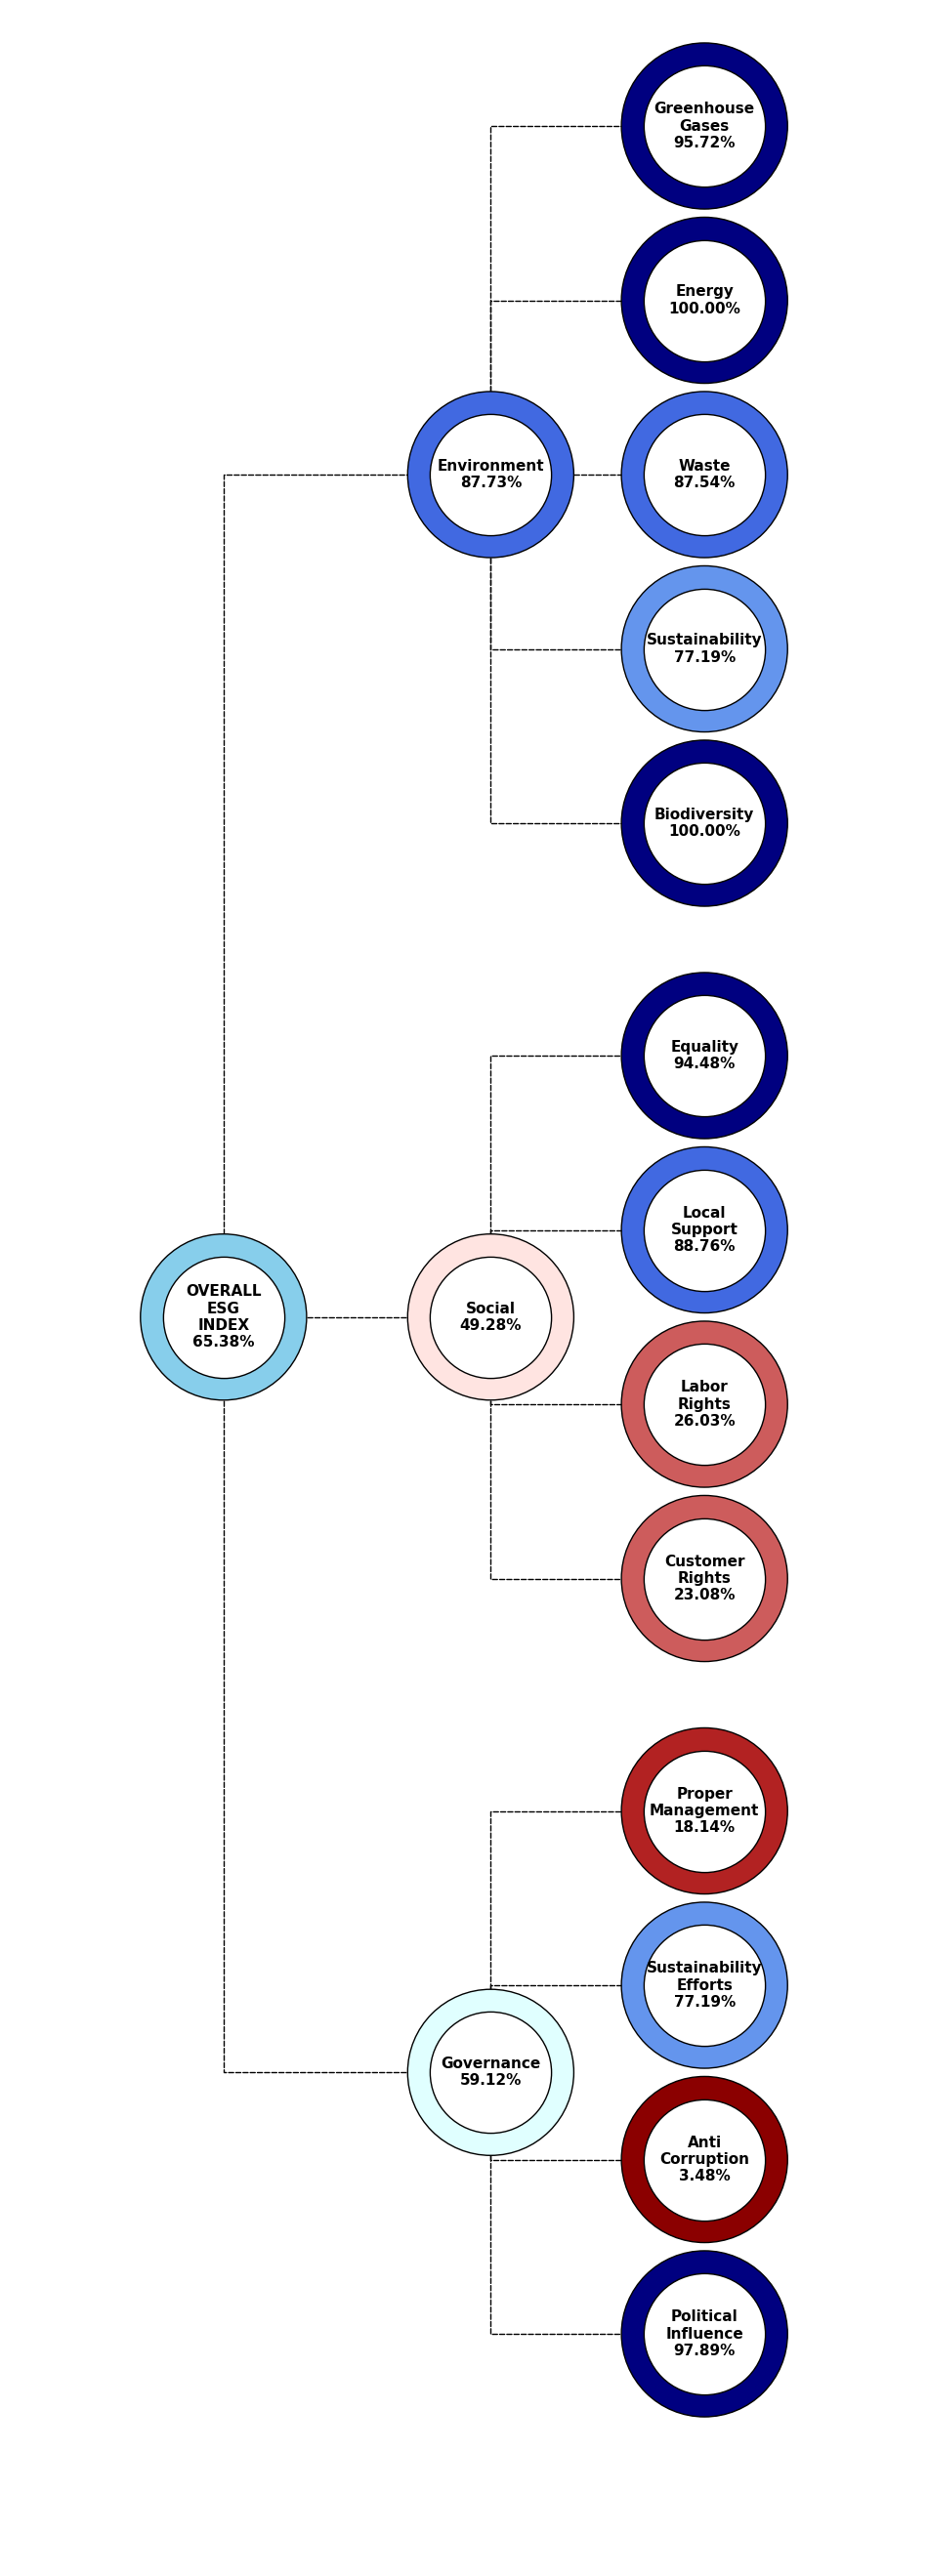

In [55]:
import networkx as nx
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 34))

From = ['OVERALL\nESG\nINDEX', 'OVERALL\nESG\nINDEX', 'OVERALL\nESG\nINDEX', 'Environment', 'Environment', 'Environment', 'Environment', 'Environment', 'Social', 'Social', 'Social', 'Social', 'Governance', 'Governance', 'Governance', 'Governance']
To = ['Environment', 'Social', 'Governance', 'Greenhouse\nGases', 'Energy', 'Waste', 'Sustainability', 'Biodiversity', 'Equality', 'Local\nSupport', 'Labor\nRights', 'Customer\nRights', 'Proper\nManagement', 'Sustainability\nEfforts', 'Anti\nCorruption', 'Political\nInfluence']

df = pd.DataFrame({'source': From, 'target': To})

# pos = {'OVERALL\nESG\nINDEX':(40, 107.5),
#        'Environment': (90, 180), 'Social': (90, 107.5), 'Governance':(90, 42.5),
#        'Greenhouse\nGases': (130, 210), 'Energy':(130, 195), 'Waste': (130, 180), 'Sustainability':(130,165), 'Biodiversity': (130,150),
#         'Equality': (130, 130), 'Local\nSupport': (130, 115), 'Labor\nRights':(130,100), 'Customer\nRights':(130, 85),
#          'Proper\nManagement': (130, 65), 'Sustainability\nEfforts':(130,50), 'Anti\nCorruption':(130,35), 'Political\nInfluence':(130, 20) }

pos = {'OVERALL\nESG\nINDEX':(40, 107.5),
       'Environment': (90, 180), 
       'Social': (90, 107.5), 
       'Governance':(90, 42.5),
       'Greenhouse\nGases': (130, 210), 
       'Energy':(130, 195), 
       'Waste': (130, 180), 
       'Sustainability':(130,165), 
       'Biodiversity': (130,150),
       'Equality': (130, 130), 
       'Local\nSupport': (130, 115), 
       'Labor\nRights':(130,100), 
       'Customer\nRights':(130, 85),
       'Proper\nManagement': (130, 65), 
       'Sustainability\nEfforts':(130,50), 
       'Anti\nCorruption':(130,35), 
       'Political\nInfluence':(130, 20) }

Edge_key = ['OVERALL\nESG\nINDEX', 'Environment', 'Social', 'Governance', 'Greenhouse\nGases', 'Energy', 'Waste', 'Sustainability', 'Biodiversity', 'Equality', 'Local\nSupport', 'Labor\nRights', 'Customer\nRights', 'Proper\nManagement', 'Sustainability\nEfforts', 'Anti\nCorruption', 'Political\nInfluence']

G = nx.from_pandas_edgelist(df, create_using=nx.DiGraph())

Circles = list(G.nodes)

attrs = {}
Colors = []

weights = [ESG_Index, Environment, Social, Governance, GHG, Energy, Waste, Sustainability, Biodiversity, Equality, Local_Support, Labor_Rights, Customer_Rights, Proper_Management, Sustainability, Anti_Corruption, Political_Influence]

for lab, weight in zip(Edge_key, weights):
    attrs[lab] = {'weight': weight}
    if weight > 90:
        Colors.append('navy')
    elif weight > 80:
        Colors.append('royalblue')
    elif weight > 70:
        Colors.append('cornflowerblue')
    elif weight > 60:
        Colors.append('skyblue')
    elif weight > 50:
        Colors.append('lightcyan')
    elif weight > 40:
        Colors.append('mistyrose')
    elif weight > 30:
        Colors.append('lightcoral')
    elif weight > 20:
        Colors.append('indianred')
    elif weight > 10:
        Colors.append('firebrick')
    else:
        Colors.append('darkred')

nx.set_node_attributes(G, attrs)

Labels = {lab: f"{lab}\n{attrs[lab]['weight']:.2f}%" for lab in Edge_key}

pos2 = {Edge_key[i]: pos[Edge_key[i]] for i in range(1, 4)}
pos3 = {Edge_key[i]: pos[Edge_key[i]] for i in range(5, len(Edge_key))}

nx.draw_networkx_nodes(G, pos, nodelist=Circles, node_size=1.5e4, node_shape='o', edgecolors='black', node_color=Colors)
nx.draw_networkx_nodes(G, pos, nodelist=Circles, node_size=8e3, node_shape='o', edgecolors='black', node_color='white')
nx.draw_networkx_labels(G, pos, Labels, font_size=11, font_color='black', font_weight='bold')
nx.draw_networkx_edges(G, pos, connectionstyle='angle', style='dashed')

plt.xlim(0, 170)
plt.ylim(0, 220)
plt.axis('off')
plt.show()
